In [2]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download atifaliak/youtube-comments-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/atifaliak/youtube-comments-dataset
License(s): DbCL-1.0
  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 125MB/s]


In [4]:
!unzip youtube-comments-dataset.zip

Archive:  youtube-comments-dataset.zip
  inflating: YoutubeCommentsDataSet.csv  


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv('YoutubeCommentsDataSet.csv')

In [8]:
data.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [9]:
data.shape

(18408, 2)

In [10]:
data.isnull().sum()

,0
Comment,44
Sentiment,0


In [11]:
data.dropna(axis=0,inplace=True)

<Axes: xlabel='count', ylabel='Sentiment'>

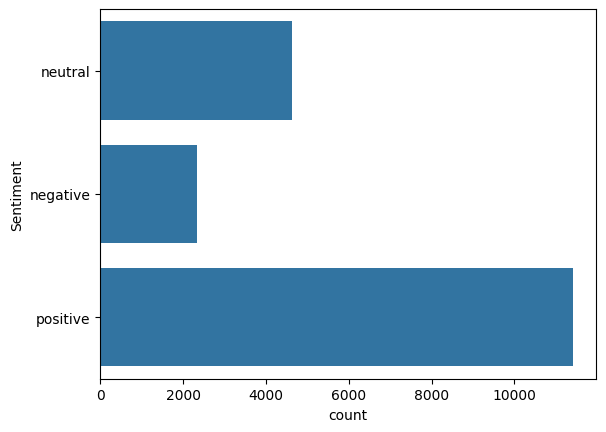

In [12]:
sns.countplot(data["Sentiment"])

In [13]:
from sklearn.utils import resample

In [14]:
positive=data[data["Sentiment"]=="positive"]
negative=data[data["Sentiment"]=="negative"]
neutral=data[data["Sentiment"]=="neutral"]

In [15]:
min_size=len(negative)
min_size

2337

In [16]:
positive_downed=resample(positive,replace=True,n_samples=min_size,random_state=42)
neutral_downed=resample(neutral,replace=True,n_samples=min_size,random_state=42)

In [17]:
data=pd.concat([positive_downed,negative,neutral_downed])

In [18]:
data["Sentiment"].value_counts()

,count
Sentiment,
positive,2337
negative,2337
neutral,2337


In [19]:
balanced_df=data.sample(frac=1,random_state=42)

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stop_words=set(stopwords.words('english'))

In [22]:
def stop_words(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [23]:
data["Comment"]=data["Comment"].apply(stop_words)

In [24]:
data.head()


,Comment,Sentiment
11753,yo tarpor really showed charismatic smart stro...,positive
1655,amazing thing leon shone mic hes never regarde...,positive
8940,take moment appreciate much time effort puts v...,positive
8689,love playlist use time gaming,positive
18248,loved content love effort put every single vid...,positive


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
data["Sentiment"]=le.fit_transform(data["Sentiment"])

In [28]:
data.reset_index(drop=True)
data.head()
data["Sentiment"].value_counts()

,count
Sentiment,
2,2337
0,2337
1,2337


In [29]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    data["Comment"], data["Sentiment"], test_size=0.2, random_state=42,shuffle=True
)

In [31]:
y_train.value_counts()

,count
Sentiment,
1,1895
0,1860
2,1853


In [32]:
X_train[:2]

,Comment
5184,apples major security flaws happened many time...
470,cool like said jurassic park entertainment sci...


In [33]:
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)


In [34]:
nb=MultinomialNB()

In [35]:
nb.fit(X_train,y_train)

MultinomialNB()

In [36]:
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7084818246614397
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       477
           1       0.78      0.48      0.59       442
           2       0.73      0.83      0.78       484

    accuracy                           0.71      1403
   macro avg       0.72      0.70      0.70      1403
weighted avg       0.72      0.71      0.70      1403



Lets try with some more models

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer

In [46]:
models={
    "RandomForestClassifier":(RandomForestClassifier(),{
                            "n_estimators": [50, 100, 200],
                            "max_depth": [10, 20, None],
                            "min_samples_split": [2, 5, 10],
                            "min_samples_leaf": [1, 2, 4]}),
    "GradientBoostingClassifier":(GradientBoostingClassifier(),{
                            "n_estimators": [50, 100, 200],
                            "learning_rate": [0.01, 0.1, 0.2],
                            "max_depth": [3, 4, 5]
                            }),
    "AdaBoostClassifier":(AdaBoostClassifier(),{
        "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0] }),
    "SVC":(SVC(),{
        "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]}),
    "LogisticRegression":(LogisticRegression(),{
        "C": [0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [100, 200, 500]}),
    "KNeighborsClassifier":(KNeighborsClassifier(),{
        "n_neighbors": [3, 5, 7],  # Number of neighbors
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]  }),
    "DecisionTreeClassifier":(DecisionTreeClassifier(),{
        "criterion": ["gini", "entropy"],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
    })
}

In [47]:
result={}

In [49]:
f1 = make_scorer(f1_score, average="macro")
for model_name,(model,params) in models.items():
    grid=GridSearchCV(model,params,cv=5,scoring=f1,verbose=True)
    grid.fit(X_train,y_train)

    result[model_name]={
        "model":grid.best_estimator_,
        "best_score":grid.best_score_,
        "best_params":grid.best_params_

    }

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [43]:
import numpy as np

print("Unique class labels in y_train:", np.unique(y_train))


Unique class labels in y_train: [0 1 2]
